<a href="https://colab.research.google.com/github/ShathaAlW/Rental-analysis/blob/main/rentals_associations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [60]:
rentals = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv")

In [61]:
rentals.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


In [62]:
rentals.no_fee.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_roofdeck.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_washer_dryer.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_doorman.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_elevator.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_dishwasher.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_patio.replace({1:'yes', 0:'no'}, inplace=True)
rentals.has_gym.replace({1:'yes', 0:'no'}, inplace=True)
rentals.drop(columns=['rental_id', 'building_id'], inplace=True)

In [63]:
rentals.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,2550,0.0,1,480,9,2.0,17,yes,yes,no,no,yes,yes,no,yes,Upper East Side,All Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,no,no,no,no,no,no,no,no,Greenwich Village,All Downtown,Manhattan
2,3000,3.0,1,1000,4,1.0,106,no,no,no,no,no,no,no,no,Astoria,Northwest Queens,Queens
3,4500,1.0,1,916,2,51.0,29,no,yes,no,yes,yes,yes,no,no,Midtown,All Midtown,Manhattan
4,4795,1.0,1,975,3,8.0,31,no,no,no,yes,yes,yes,no,yes,Greenwich Village,All Downtown,Manhattan


# Association between: Quantitative & Categorical Variables



> check the association between rent and borough



In [64]:
# can either extract data for each borough separately
# rent_manhattan = rentals.rent[rentals.borough == 'Manhattan']
# or
rentals.groupby('borough').mean().rent

borough
Brooklyn     3327.403751
Manhattan    5138.940379
Queens       2516.147321
Name: rent, dtype: float64

In [65]:
rentals.groupby('borough').median().rent

borough
Brooklyn     3000.0
Manhattan    4000.0
Queens       2350.0
Name: rent, dtype: float64

In general, we see that the mean rent of each borough is higher than its median, which indicates that there is some right-skewness in data and outliers.

> the mean difference of rent between (Manhattan & Queens) and (Manhattan & Brooklyn) is large. There is also a noticable mean difference, although smaller, between (Brooklyn & Queens)

> there is an almost large rent median difference between all three bouroughs with the largest between (Manhattan & Queens)

all of which indicates that there is an association between rent and borough. We can use visulization to further confirm this.




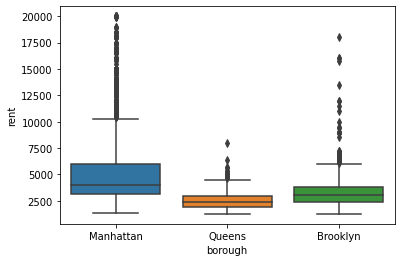

In [66]:
sns.boxplot(data = rentals, x= 'borough', y= 'rent')
plt.show()

We can see that the middle 50% of data/boxes of the three borough rents' don't overlap (indicating an association), but the boxses are overly squished because of the outliers.

> re-plot the boxes with less outliers for better visualization - let's say 10,000 usd and less for rent



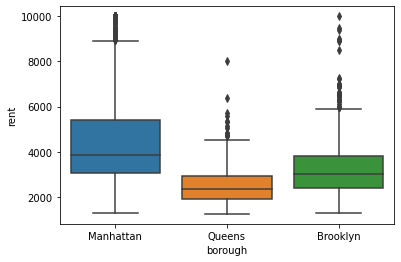

In [67]:
sns.boxplot(data = rentals[rentals.rent <= 10000] , x= 'borough', y= 'rent')
plt.show()

plotting an overlapping histograms of Manhattan and Queens rents

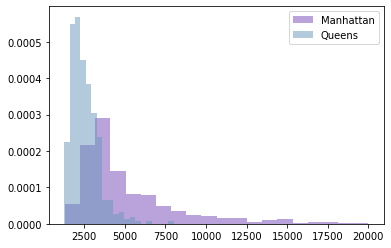

In [83]:
plt.hist(rentals.rent[rentals.borough == 'Manhattan'], alpha= 0.5 , color = '#7747b6',bins= 20, density= True, label= 'Manhattan')
plt.hist(rentals.rent[rentals.borough == 'Queens'], alpha= 0.5 , color = '#6897bb',bins= 20, density= True, label= 'Queens')
plt.legend()
plt.show()



> check the association between rent and having washer/dryer



In [69]:
rentals.groupby('has_washer_dryer').mean().rent

has_washer_dryer
no     4426.231817
yes    5253.503737
Name: rent, dtype: float64

In [70]:
rentals.groupby('has_washer_dryer').median().rent

has_washer_dryer
no     3500
yes    4100
Name: rent, dtype: int64

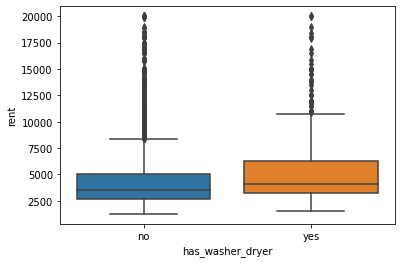

In [71]:
sns.boxplot(data=rentals , x='has_washer_dryer', y= 'rent')
plt.show()

There is some overlap between the boxses. There is an association between having a washer/dryer and rent. We see that rentals with washer/dryer has a higher mean and median rent that the one that don't. So knowing whether a rentals has a washer/dryer gives us an information about the rent.

# Associtaion between: Two Quantitive Variables



> check the association between rent and size sqfeet of rentals



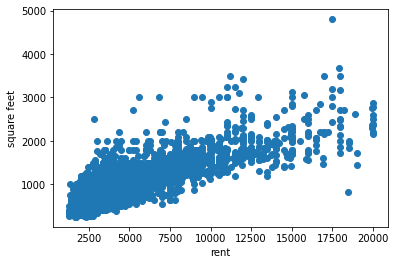

In [100]:
plt.scatter(rentals.rent , rentals.size_sqft)
plt.xlabel('rent')
plt.ylabel('square feet')
plt.show()

In [101]:
# calculate correlation
import scipy.stats as stat

rent_size_corr = stat.pearsonr(rentals.rent, rentals.size_sqft)
print(rent_size_corr)

(0.8087835060658337, 0.0)


a positive correlation of 0.8 suggests that the two variables of rent and size of rental are highly associated. Also, from the scatter plot we can see a positive linear relationship between the two.

check the correlation for all other quantitive variables and plot a heatmap

In [102]:
rentals.corr()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
rent,1.000000,0.531200,0.733644,0.808784,0.003652,0.272351,-0.122302
bedrooms,0.531200,1.000000,0.647499,0.738410,0.053365,-0.006468,0.070329
bathrooms,0.733644,0.647499,1.000000,0.770593,0.054891,0.145303,-0.103050
size_sqft,0.808784,0.738410,0.770593,1.000000,0.024422,0.100234,0.026434
min_to_subway,0.003652,0.053365,0.054891,0.024422,1.000000,0.029242,-0.138273
floor,0.272351,-0.006468,0.145303,0.100234,0.029242,1.000000,-0.352757
building_age_yrs,-0.122302,0.070329,-0.103050,0.026434,-0.138273,-0.352757,1.000000


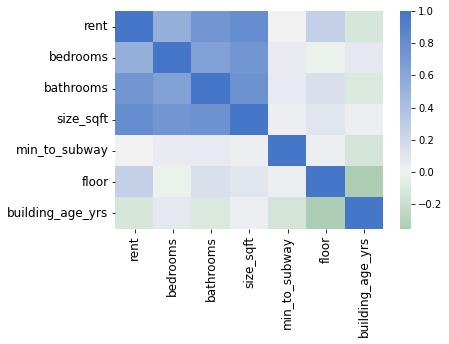

In [114]:
colors = sns.diverging_palette(133, 254, as_cmap= True)
sns.heatmap(rentals.corr(), center= 0, cmap= colors)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

checking a correlation that was negative, using a scatter plot

> check the association between building age in years & floor



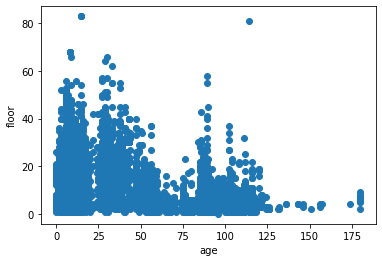

In [121]:
plt.scatter(rentals.building_age_yrs, rentals.floor)
plt.xlabel('age')
plt.ylabel('floor')
plt.show()

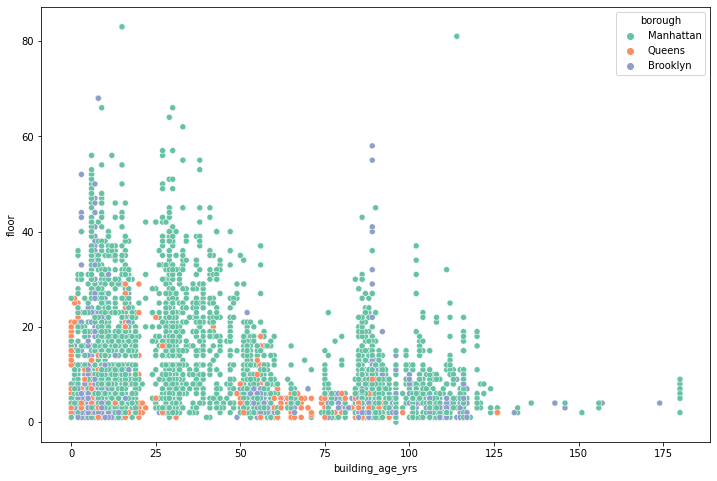

In [131]:
# scatter plot of building age & floor using seaborn + which borough the rental is located in
plt.figure(figsize=(12,8))
sns.scatterplot(x= 'building_age_yrs', y= 'floor', data= rentals, hue= 'borough', palette='Set2')
plt.show()

checking a zero correlation

> check the association between rent & mins to subway


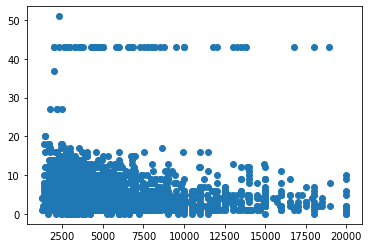

In [132]:
plt.scatter(rentals.rent, rentals.min_to_subway)
plt.show()

In [ ]:
sns.pairplot(rentals)
plt.show()

# Associations between: Two Categorical Variables



> check the association between a rental having a patio & borough its located 



In [140]:
patio_borough_cont_freq = pd.crosstab(rentals.borough, rentals.has_patio)
print(patio_borough_cont_freq)

has_patio    no  yes
borough             
Brooklyn    991   22
Manhattan  3344  195
Queens      437   11


In [141]:
patio_borough_cont_prop = patio_borough_cont_freq/len(rentals)
print(patio_borough_cont_prop)

has_patio      no     yes
borough                  
Brooklyn   0.1982  0.0044
Manhattan  0.6688  0.0390
Queens     0.0874  0.0022


In [149]:
patio_marg = patio_borough_cont_prop.sum(axis=0)
borough_marg = patio_borough_cont_prop.sum(axis=1)
print(patio_marg, '\n')
# very big percentage of rentals has no patio (95.44%)
print(borough_marg)
# assuming that each borough has 33.3%, Manhattan has a very high percentage (70.78%)

has_patio
no     0.9544
yes    0.0456
dtype: float64 

borough
Brooklyn     0.2026
Manhattan    0.7078
Queens       0.0896
dtype: float64


In [162]:
import scipy.stats as stat

chi2, pval, dof, expected = stat.chi2_contingency(patio_borough_cont_freq)
print(expected, '\n')
# expected values are slightly different from the observed ones
print(chi2)
# 25.2 is larger than 9, some small association between the two variables

[[ 966.8072   46.1928]
 [3377.6216  161.3784]
 [ 427.5712   20.4288]] 

25.17515005189066


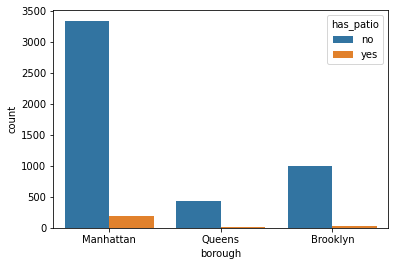

In [154]:
sns.countplot(x= rentals.borough , hue= rentals.has_patio)
plt.show()

In the barplot, we see most rentals has no patio as we calculated above, and most of the rentals are located in Manhattan.



> check the association between a rental having a doorman & having to pay a fee



In [158]:
doorman_fee_cont_freq = pd.crosstab(rentals.no_fee, rentals.has_doorman)
print(doorman_fee_cont_freq)

has_doorman    no  yes
no_fee                
no           2020  832
yes          1840  308


In [159]:
doorman_fee_cont_prop = doorman_fee_cont_freq/len(rentals)
print(doorman_fee_cont_prop)

has_doorman     no     yes
no_fee                    
no           0.404  0.1664
yes          0.368  0.0616


In [160]:
doorman_marg = doorman_fee_cont_prop.sum(axis= 0)
fee_marg = doorman_fee_cont_prop.sum(axis= 1)
print(doorman_marg, '\n')
print(fee_marg)

has_doorman
no     0.772
yes    0.228
dtype: float64 

no_fee
no     0.5704
yes    0.4296
dtype: float64


In [170]:
from scipy.stats import chi2_contingency

# expected
print(chi2_contingency(doorman_fee_cont_freq)[3], '\n')
# expcted values are different from observed value by almost 200.


# chi-square statistic
print(chi2_contingency(doorman_fee_cont_freq)[0])
# chi2 of 152.3 is larger than 4, suggesting that there is an association between the two variables

[[2201.744  650.256]
 [1658.256  489.744]]


152.3215447873812


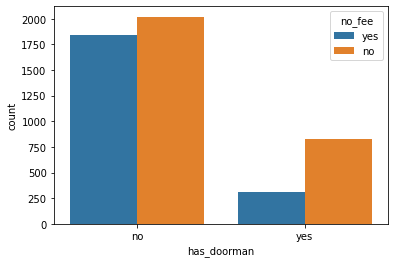

In [173]:
sns.countplot(x='has_doorman', hue='no_fee', data= rentals)
plt.show()

The barplot cofirms our calculations that most offered rentals has no doorman (77.2%). For those that have a doorman, most of them have to pay a fee.